In [1]:
!pip install kaleido
#pip install plotly
#Preprocessing the text file that contains information about training loss
import pandas as pd

#file = open("/kaggle/input/val-loss-shrec/loss_log.txt") 
#content = file.readlines() 

marker = []

with open("/kaggle/input/loss-log-nag-adagrad-600/loss_log_nag_adagrad_600.txt", "r") as file:
    content = file.readlines() 

for i in range(len(content)):
    if content[i][0] == "=": 
        marker.append(i) 

with open('output.txt', 'w') as f1:
    for i in range(len(content)): 
        if not i in marker: 
            f1.write(content[i]) 
        

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00


In [2]:
f1 = open('output.txt', 'r')
f2 = open('file2.txt', 'w')
checkWords = (":","(",")")
repWords = (",","",",")

for line in f1:
    for check, rep in zip(checkWords, repWords):
        line = line.replace(check, rep)
    f2.write(line)
f1.close()


In [3]:
#making a dataframe from the text file, so that it can be used to plot graphs
df = pd.read_csv('file2.txt', names=['Epoch$','Epoch','iters$','iters','time$','time','data$','data','loss$', 'loss'])    
df

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
0,epoch,1,iters,80,time,0.248,data,1.935,loss,3.398
1,epoch,1,iters,160,time,0.246,data,0.022,loss,3.366
2,epoch,1,iters,240,time,0.248,data,0.009,loss,3.390
3,epoch,1,iters,320,time,0.248,data,0.006,loss,3.366
4,epoch,1,iters,400,time,0.247,data,0.006,loss,3.379
...,...,...,...,...,...,...,...,...,...,...
21602,epoch,598,iters,480,time,0.289,data,0.000,loss,0.305
21603,epoch,599,iters,80,time,0.257,data,0.961,loss,0.327
21604,epoch,599,iters,160,time,0.255,data,0.000,loss,0.259
21605,epoch,599,iters,240,time,0.264,data,0.001,loss,0.287


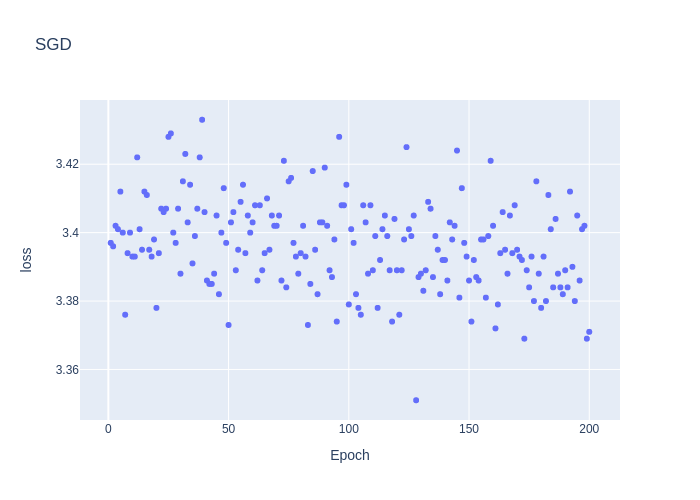

In [4]:
#Plotting loss graph for SGD
import plotly.express as px
fig = px.scatter(df[1523:2723:6], x="Epoch", y="loss", title = "SGD")
#fig.show()
#fig.show(renderer='iframe')
fig.show(renderer='png')

In [5]:
#Plotting loss graph for SGD with Momentum
import plotly.express as px
fig = px.line(df[5519:(5519+1200):6], x="Epoch", y="loss", title = "SGD with Momentum")
#fig.show()
fig.show(renderer='iframe')

In [6]:
#Plotting loss graph for NAG
import plotly.express as px
fig = px.line(df[18015:(18015+1200):6], x="Epoch", y="loss", title = "NAG")
#fig.show()
fig.show(renderer='iframe')

In [7]:
#Plotting loss graph for Ada Grad
import plotly.express as px
fig = px.line(df[7919:(7919+1200):6], x="Epoch", y="loss", title = "Ada Grad")
#fig.show()
fig.show(renderer='iframe')

In [8]:
#Plotting loss graph for RMS prop
import plotly.express as px
fig = px.line(df[6719:(6719+1200):6], x="Epoch", y="loss", title = "RMS prop")
#fig.show()
fig.show(renderer='iframe')

In [9]:
#Plotting loss graph for Adam
import plotly.express as px
fig = px.line(df[3119:(3119+1200):6], x="Epoch", y="loss", title = "Adam")
#fig.show()
fig.show(renderer='iframe')

In [10]:
#Plotting loss graph for NAG (600 epochs)
import plotly.express as px
fig = px.line(df[18015:(18015+600*6):12], x="Epoch", y="loss", title = "NAG with 600 epochs")
#fig.show()
fig.show(renderer='iframe')

In [11]:
#Plotting loss graph for Ada Grad (600 epochs)
import plotly.express as px
fig = px.line(df[13409:(13409+600*6):12], x="Epoch", y="loss", title = "Ada Grad with 600 epochs")
#fig.show()
fig.show(renderer='iframe')

In [12]:
df[1520:1530]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
1520,epoch,12,iters,320,time,0.246,data,0.006,loss,2.777
1521,epoch,12,iters,400,time,0.244,data,0.000,loss,2.764
1522,epoch,12,iters,480,time,0.245,data,0.011,loss,2.762
1523,epoch,1,iters,80,time,0.249,data,1.353,loss,3.397
1524,epoch,1,iters,160,time,0.248,data,0.009,loss,3.421
1525,epoch,1,iters,240,time,0.248,data,0.000,loss,3.389
1526,epoch,1,iters,320,time,0.250,data,0.028,loss,3.397
1527,epoch,1,iters,400,time,0.248,data,0.009,loss,3.398
1528,epoch,1,iters,480,time,0.247,data,0.000,loss,3.422
1529,epoch,2,iters,80,time,0.248,data,0.815,loss,3.396


In [13]:
df[2720:2730]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
2720,epoch,200,iters,320,time,0.248,data,0.006,loss,3.377
2721,epoch,200,iters,400,time,0.247,data,0.006,loss,3.399
2722,epoch,200,iters,480,time,0.247,data,0.009,loss,3.404
2723,epoch,1,iters,80,time,0.248,data,0.389,loss,3.413
2724,epoch,1,iters,160,time,0.248,data,0.000,loss,3.392
2725,epoch,1,iters,240,time,0.250,data,0.006,loss,3.417
2726,epoch,1,iters,320,time,0.250,data,0.013,loss,3.408
2727,epoch,1,iters,400,time,0.250,data,0.000,loss,3.400
2728,epoch,1,iters,480,time,0.247,data,0.008,loss,3.403
2729,epoch,2,iters,80,time,0.248,data,0.266,loss,3.422


In [14]:
df[3113:3133]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
3113,epoch,10,iters,80,time,0.244,data,0.550,loss,3.415
3114,epoch,10,iters,160,time,0.251,data,0.000,loss,3.371
3115,epoch,10,iters,240,time,0.244,data,0.006,loss,3.409
3116,epoch,10,iters,320,time,0.245,data,0.013,loss,3.378
3117,epoch,10,iters,400,time,0.269,data,0.000,loss,3.381
3118,epoch,10,iters,480,time,0.258,data,0.006,loss,3.389
3119,epoch,1,iters,80,time,0.243,data,0.782,loss,3.403
3120,epoch,1,iters,160,time,0.243,data,0.008,loss,3.415
3121,epoch,1,iters,240,time,0.242,data,0.006,loss,3.402
3122,epoch,1,iters,320,time,0.244,data,0.007,loss,3.408


In [15]:
df[5515:5535]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
5515,epoch,200,iters,240,time,0.238,data,0.014,loss,0.156
5516,epoch,200,iters,320,time,0.236,data,0.006,loss,0.050
5517,epoch,200,iters,400,time,0.237,data,0.000,loss,0.174
5518,epoch,200,iters,480,time,0.239,data,0.025,loss,0.042
5519,epoch,1,iters,80,time,0.245,data,0.235,loss,3.410
5520,epoch,1,iters,160,time,0.244,data,0.000,loss,3.406
5521,epoch,1,iters,240,time,0.244,data,0.013,loss,3.387
5522,epoch,1,iters,320,time,0.242,data,0.006,loss,3.423
5523,epoch,1,iters,400,time,0.243,data,0.000,loss,3.409
5524,epoch,1,iters,480,time,0.261,data,0.013,loss,3.415


In [16]:
df[6715:6735]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
6715,epoch,200,iters,240,time,0.244,data,0.008,loss,2.040
6716,epoch,200,iters,320,time,0.244,data,0.012,loss,2.098
6717,epoch,200,iters,400,time,0.243,data,0.000,loss,1.860
6718,epoch,200,iters,480,time,0.244,data,0.006,loss,2.015
6719,epoch,1,iters,80,time,0.244,data,1.050,loss,3.433
6720,epoch,1,iters,160,time,0.242,data,0.000,loss,3.405
6721,epoch,1,iters,240,time,0.243,data,0.007,loss,3.444
6722,epoch,1,iters,320,time,0.240,data,0.016,loss,3.340
6723,epoch,1,iters,400,time,0.241,data,0.000,loss,3.252
6724,epoch,1,iters,480,time,0.241,data,0.006,loss,3.309


In [17]:
df[7917:7937]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
7917,epoch,200,iters,400,time,0.238,data,0.000,loss,0.009
7918,epoch,200,iters,480,time,0.240,data,0.000,loss,0.004
7919,epoch,1,iters,80,time,0.276,data,1.352,loss,3.409
7920,epoch,1,iters,160,time,0.267,data,0.000,loss,3.392
7921,epoch,1,iters,240,time,0.267,data,0.009,loss,3.419
7922,epoch,1,iters,320,time,0.268,data,0.017,loss,3.379
7923,epoch,1,iters,400,time,0.269,data,0.000,loss,3.386
7924,epoch,1,iters,480,time,0.268,data,0.011,loss,3.402
7925,epoch,2,iters,80,time,0.269,data,0.851,loss,3.375
7926,epoch,2,iters,160,time,0.267,data,0.007,loss,3.373


In [18]:
df[13405:13440]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
13405,epoch,1,iters,240,time,0.245,data,0.000,loss,3.382
13406,epoch,1,iters,320,time,0.245,data,0.018,loss,3.355
13407,epoch,1,iters,400,time,0.243,data,0.000,loss,3.355
13408,epoch,1,iters,480,time,0.245,data,0.000,loss,3.364
13409,epoch,1,iters,80,time,0.246,data,1.279,loss,3.389
13410,epoch,1,iters,160,time,0.244,data,0.000,loss,3.402
13411,epoch,1,iters,240,time,0.246,data,0.006,loss,3.386
13412,epoch,1,iters,320,time,0.244,data,0.029,loss,3.411
13413,epoch,1,iters,400,time,0.244,data,0.000,loss,3.388
13414,epoch,1,iters,480,time,0.246,data,0.006,loss,3.372


In [19]:
df[18011:18051]

,Epoch$,Epoch,iters$,iters,time$,time,data$,data,loss$,loss
18011,epoch,52,iters,80,time,0.262,data,0.790,loss,3.194
18012,epoch,52,iters,160,time,0.260,data,0.000,loss,3.145
18013,epoch,52,iters,240,time,0.263,data,0.000,loss,3.233
18014,epoch,52,iters,320,time,0.262,data,0.020,loss,3.195
18015,epoch,1,iters,80,time,0.245,data,1.261,loss,3.400
18016,epoch,1,iters,160,time,0.245,data,0.008,loss,3.422
18017,epoch,1,iters,240,time,0.244,data,0.006,loss,3.412
18018,epoch,1,iters,320,time,0.247,data,0.006,loss,3.407
18019,epoch,1,iters,400,time,0.245,data,0.007,loss,3.395
18020,epoch,1,iters,480,time,0.245,data,0.006,loss,3.414
